In [6]:
 !pip install ftfy

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import ftfy


nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga de datos

In [8]:
# data = data = pd.read_csv(
#     "training.1600000.processed.noemoticon.csv",
#     encoding="latin1",
#     engine="python",
#     header=None,
# )

data = data = pd.read_csv(
    "/content/drive/MyDrive/training.1600000.processed.noemoticon.csv",
    encoding="latin1",
    engine="python",
    header=None,
)

data.columns = ['target', 'id', 'date', 'query', 'user', 'text']
data = data[['date', 'user', 'text', 'target']]

In [9]:
data.head()

,date,user,text,target
0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,0
2,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,0
4,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",0


# Inspección de datos

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1600000 non-null  object
 1   user    1600000 non-null  object
 2   text    1600000 non-null  object
 3   target  1600000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 48.8+ MB


In [11]:
data.describe()

,target
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [12]:
print(data.target.unique())

[0 4]


In [13]:
data.isnull().sum()

,0
date,0
user,0
text,0
target,0


In [14]:
data.duplicated().sum() / data.shape[0] * 100

np.float64(0.01175)

In [15]:
data['target'].value_counts()

,count
target,
0,800000
4,800000


# Preprocesamiento de datos

In [16]:
data['date'] = pd.to_datetime(data['date'], format='%a %b %d %H:%M:%S PDT %Y')
data['positive'] = data['target'].apply(lambda x: True if x == 4 else False)
data.drop(columns=['target'], inplace=True)

In [17]:
data.head()

,date,user,text,positive
0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",False
1,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,False
2,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,False
3,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,False
4,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",False


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   date      1600000 non-null  datetime64[ns]
 1   user      1600000 non-null  object        
 2   text      1600000 non-null  object        
 3   positive  1600000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), object(2)
memory usage: 38.1+ MB


In [19]:
data = data.drop_duplicates().reset_index(drop=True)

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
data['text'] = data['text'].apply(lambda x: ftfy.fix_text(x.strip()))
data = data[data['text'].apply(lambda x: x.count('�') == 0)].reset_index(drop=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595604 entries, 0 to 1595603
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   date      1595604 non-null  datetime64[ns]
 1   user      1595604 non-null  object        
 2   text      1595604 non-null  object        
 3   positive  1595604 non-null  bool          
dtypes: bool(1), datetime64[ns](1), object(2)
memory usage: 38.0+ MB


In [23]:
data.head()

,date,user,text,positive
0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",False
1,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,False
2,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,False
3,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,False
4,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",False


In [24]:
import re
import string

tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # text = re.sub(r'@\w+', '@user', text)
    text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,4}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)', '', text)

    tokens = tokenizer.tokenize(text)
    tokens = [t for t in tokens if  t not in stop_words and t not in string.punctuation and t.strip()]
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    return lemmas

data['tokens'] = data['text'].apply(preprocess)


data['original_length'] = data['text'].str.len()
data['clean_length'] = data['tokens'].apply(lambda x: len(' '.join(x)))
data['original_word_count'] = data['text'].apply(lambda x: len(x.split()))
data['tokens_count'] = data['tokens'].apply(len)

In [25]:
data = data[data['original_length'] <= 140].reset_index(drop=True)
data = data[data['original_word_count'] <= 35].reset_index(drop=True)
data = data[data['clean_length'] <= 140].reset_index(drop=True)
data = data[data['tokens_count'] <= 35].reset_index(drop=True)

In [26]:
data.head()

,date,user,text,positive,tokens,original_length,clean_length,original_word_count,tokens_count
0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",False,"[awww, that's, bummer, shoulda, got, david, ca...",115,54,19,10
1,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,False,"[upset, can't, update, facebook, texting, ...,...",111,79,21,13
2,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,False,"[dived, many, time, ball, managed, save, 50, r...",89,50,18,10
3,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,False,"[whole, body, feel, itchy, like, fire]",46,31,10,6
4,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",False,"[behaving, mad, can't, see]",110,22,21,4


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595480 entries, 0 to 1595479
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   date                 1595480 non-null  datetime64[ns]
 1   user                 1595480 non-null  object        
 2   text                 1595480 non-null  object        
 3   positive             1595480 non-null  bool          
 4   tokens               1595480 non-null  object        
 5   original_length      1595480 non-null  int64         
 6   clean_length         1595480 non-null  int64         
 7   original_word_count  1595480 non-null  int64         
 8   tokens_count         1595480 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(3)
memory usage: 98.9+ MB


# Visualización de datos

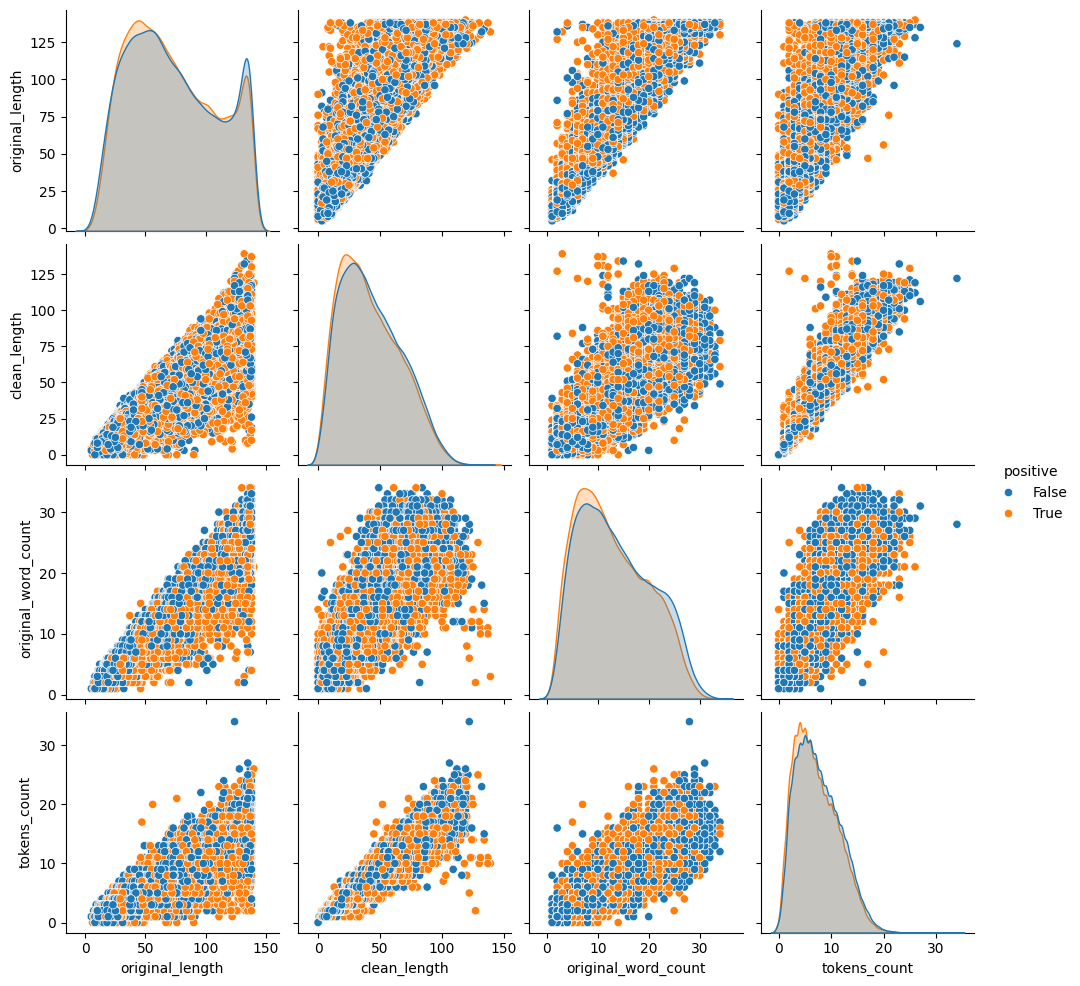

In [28]:
sns.pairplot(data.sample(data.shape[0] // 20, random_state=42),
    hue='positive',
    diag_kind='kde',
    height=2.5
)

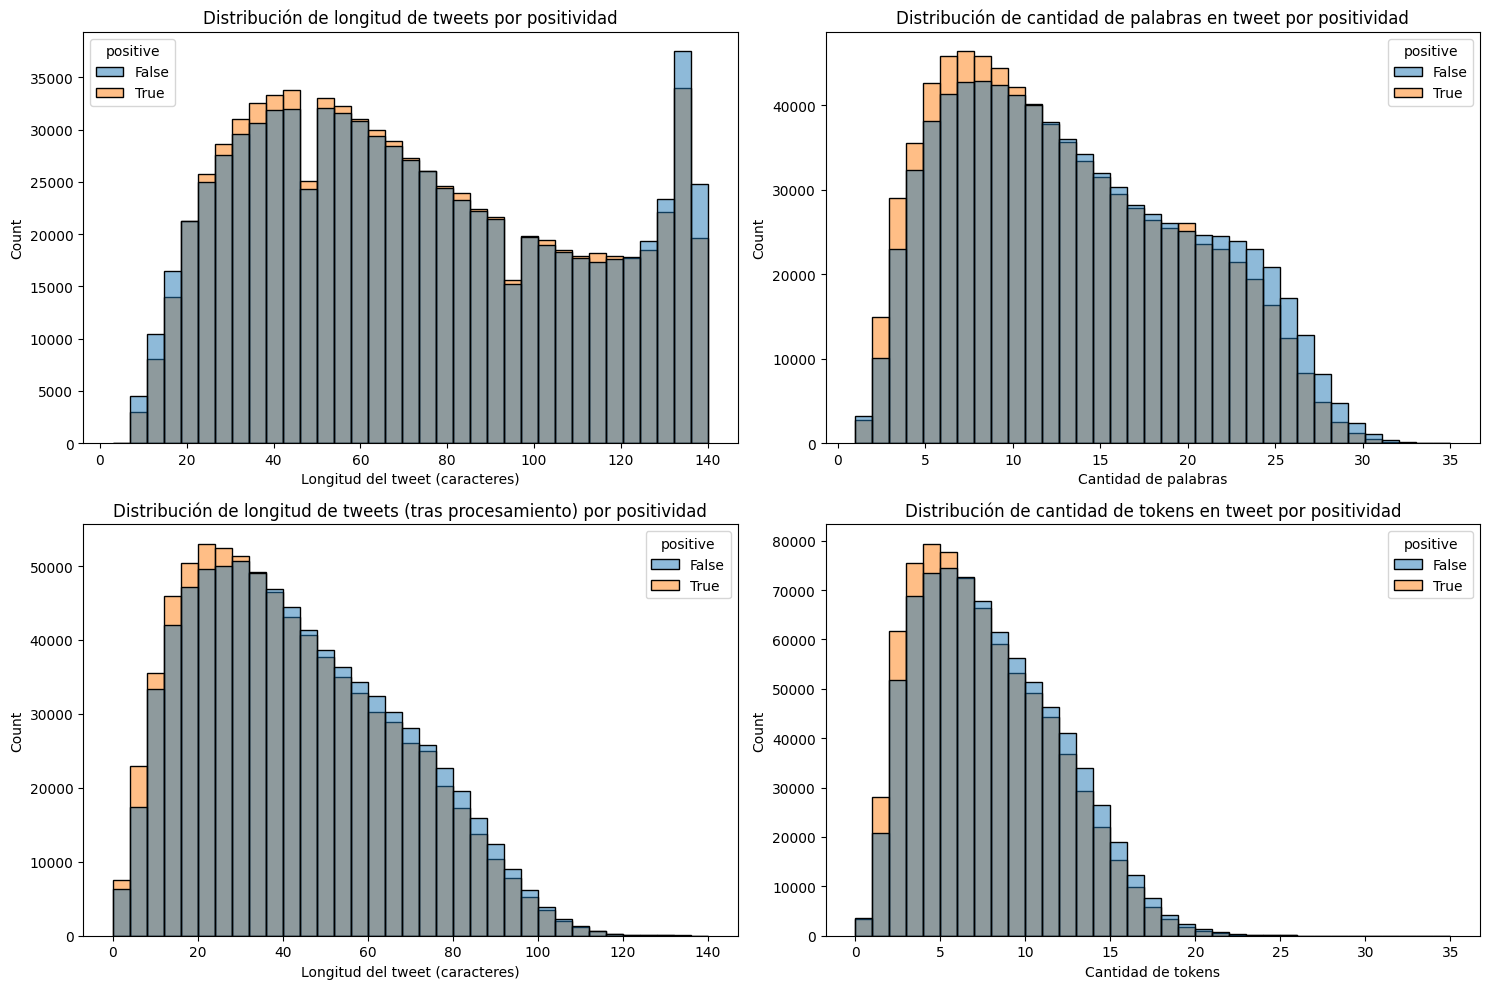

In [29]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=data, x='original_length', hue='positive', bins=35)
plt.title('Distribución de longitud de tweets por positividad')
plt.xlabel('Longitud del tweet (caracteres)')

plt.subplot(2, 2, 2)
sns.histplot(data=data, x='original_word_count', hue='positive', bins=35)
plt.title('Distribución de cantidad de palabras en tweet por positividad')
plt.xlabel('Cantidad de palabras')

plt.subplot(2, 2, 3)
sns.histplot(data=data, x='clean_length', hue='positive', bins=35)
plt.title('Distribución de longitud de tweets (tras procesamiento) por positividad')
plt.xlabel('Longitud del tweet (caracteres)')

plt.subplot(2, 2, 4)
sns.histplot(data=data, x='tokens_count', hue='positive', bins=35)
plt.title('Distribución de cantidad de tokens en tweet por positividad')
plt.xlabel('Cantidad de tokens')

plt.tight_layout()
plt.show()

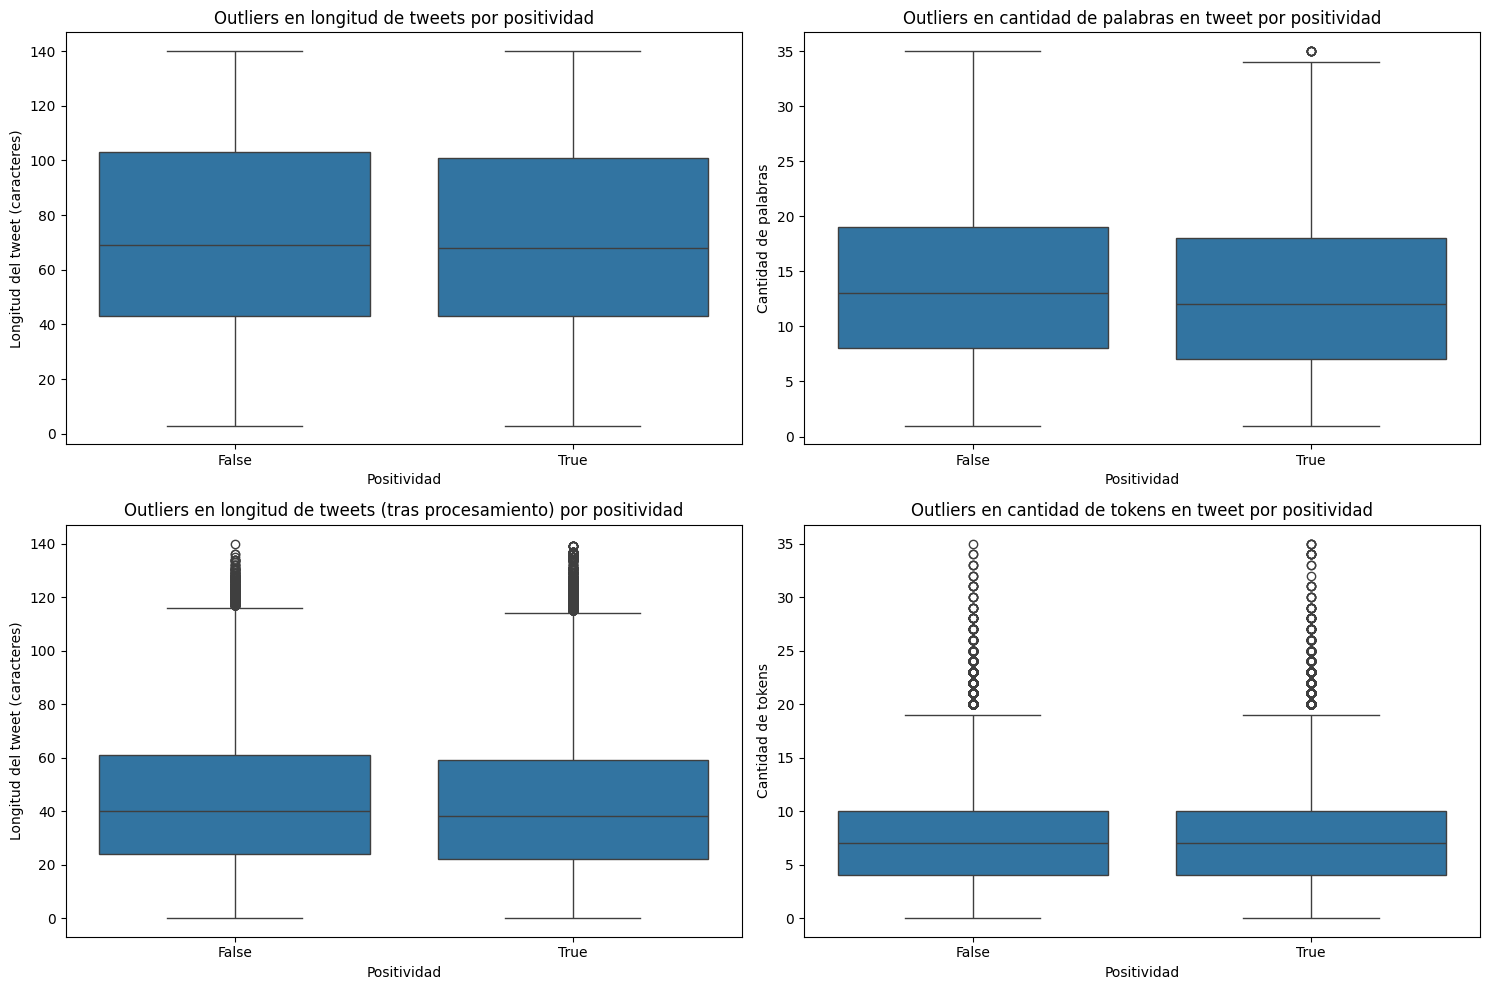

In [30]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='positive', y='original_length')
plt.title('Outliers en longitud de tweets por positividad')
plt.xlabel('Positividad')
plt.ylabel('Longitud del tweet (caracteres)')

plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='positive', y='original_word_count')
plt.title('Outliers en cantidad de palabras en tweet por positividad')
plt.xlabel('Positividad')
plt.ylabel('Cantidad de palabras')

plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='positive', y='clean_length')
plt.title('Outliers en longitud de tweets (tras procesamiento) por positividad')
plt.xlabel('Positividad')
plt.ylabel('Longitud del tweet (caracteres)')

plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='positive', y='tokens_count')
plt.title('Outliers en cantidad de tokens en tweet por positividad')
plt.xlabel('Positividad')
plt.ylabel('Cantidad de tokens')

plt.tight_layout()
plt.show()

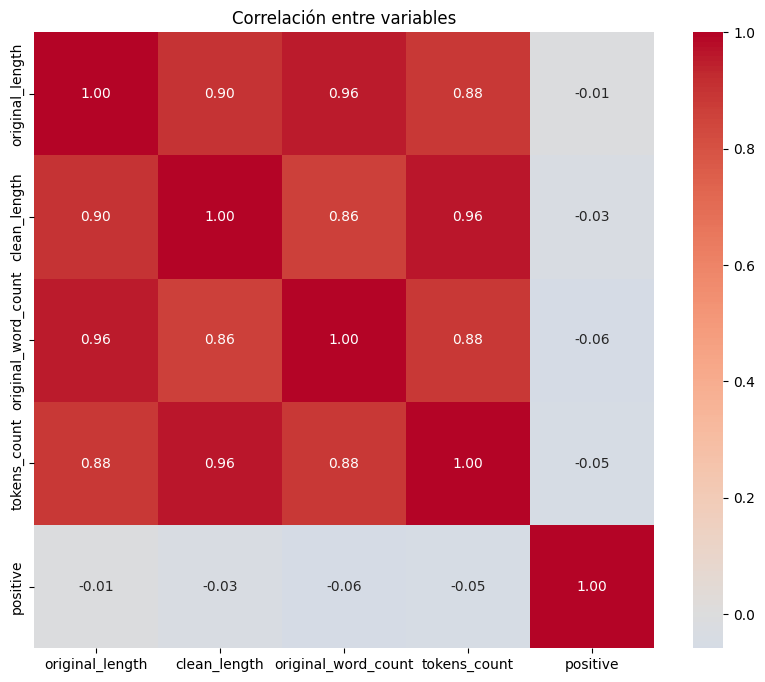

In [31]:
numerical_columns = ['original_length', 'clean_length', 'original_word_count', 'tokens_count']
numerical_data = data[numerical_columns].copy()

numerical_data['positive'] = data['positive'].astype(int)

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlación entre variables')
plt.show()

In [32]:
data = data[['date', 'user', 'text', 'original_length', 'original_word_count', 'tokens', 'clean_length', 'tokens_count', 'positive']]
data.head()

,date,user,text,original_length,original_word_count,tokens,clean_length,tokens_count,positive
0,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,19,"[awww, that's, bummer, shoulda, got, david, ca...",54,10,False
1,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,111,21,"[upset, can't, update, facebook, texting, ...,...",79,13,False
2,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,89,18,"[dived, many, time, ball, managed, save, 50, r...",50,10,False
3,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,46,10,"[whole, body, feel, itchy, like, fire]",31,6,False
4,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",110,21,"[behaving, mad, can't, see]",22,4,False


In [33]:
data.to_csv('tweets_clean.csv', index=False)